In [1]:
# date 누락한 데이터를 통해 머신러닝 돌리기

import pandas as pd

data = pd.read_csv('data/dataframes/dataframe_final.csv', index_col=0)
data = data.drop('date', axis=1) # date누락
label = pd.read_csv('data/dataframes/label_final.csv', index_col=0)

In [2]:
# mode=2인 데이터  mode = 1 로 대체

data['mode'] = data['mode'].replace(2, 1)
len(data[data['mode']==1])+len(data[data['mode']==0])

313187

In [3]:
data.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000,313187.000000
mean,415.898406,516.234039,2519.322999,0.718018,344.311536,1227.081823,783.612337,662.697312,581.615958,3150.557437
std,158.213971,199.451839,1526.611535,0.449965,305.524041,520.375149,910.091985,280.963539,238.669055,2043.887049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,309.000000,373.000000,1281.000000,0.000000,99.000000,869.000000,0.000000,524.000000,406.000000,1460.000000
50%,417.000000,525.000000,2396.000000,1.000000,212.000000,1310.000000,394.000000,668.000000,602.000000,2930.000000
75%,520.000000,663.000000,3536.000000,1.000000,583.000000,1609.000000,1443.000000,798.000000,780.000000,4571.000000
max,761.000000,932.000000,6001.000000,1.000000,1173.000000,2416.000000,3040.000000,1420.000000,1035.000000,7916.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313187 entries, 1963-01-01 to 2022-12-26
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   danceability      313187 non-null  int64
 1   energy            313187 non-null  int64
 2   loudness          313187 non-null  int64
 3   mode              313187 non-null  int64
 4   speechiness       313187 non-null  int64
 5   acousticness      313187 non-null  int64
 6   instrumentalness  313187 non-null  int64
 7   liveness          313187 non-null  int64
 8   valence           313187 non-null  int64
 9   tempo             313187 non-null  int64
dtypes: int64(10)
memory usage: 34.3+ MB


In [5]:
label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313187 entries, 1963-01-01 to 2022-12-26
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       313187 non-null  int64
dtypes: int64(1)
memory usage: 4.8+ MB


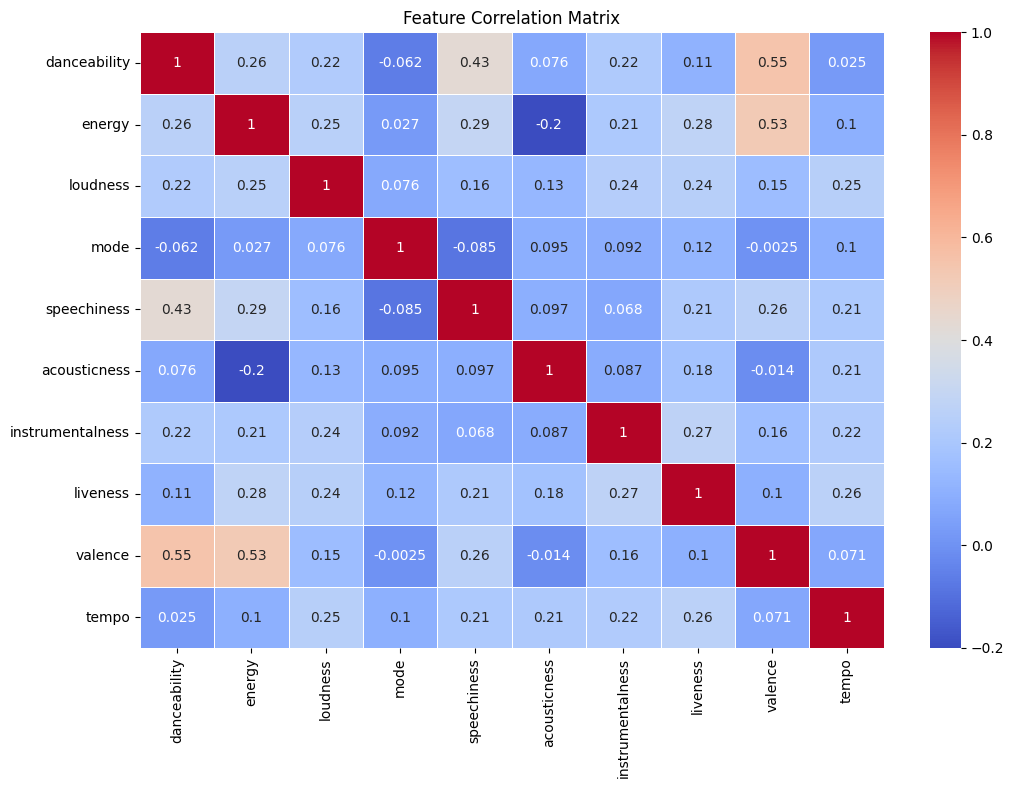

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관 행렬 계산
corr_matrix = data.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [6]:
df = pd.concat([data, label], axis=1)
df = df.rename(columns={'0': 'rank'})
data2022 = df[df.index.str.slice(0,4) == '2022']
label2022 = data2022['rank']
data2022 = data2022.drop('rank', axis=1)

In [7]:
# 60년 데이터 선형회귀
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

std = StandardScaler()
data_std = std.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(data_std, label, test_size=0.3, random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.0037628431517408023

In [8]:
# 2022데이터 선형회귀
std = StandardScaler()
data2022_std = std.fit_transform(data2022)

X_train, X_test, y_train, y_test = train_test_split(data2022_std, label2022, test_size=0.3, random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.007289148134505763

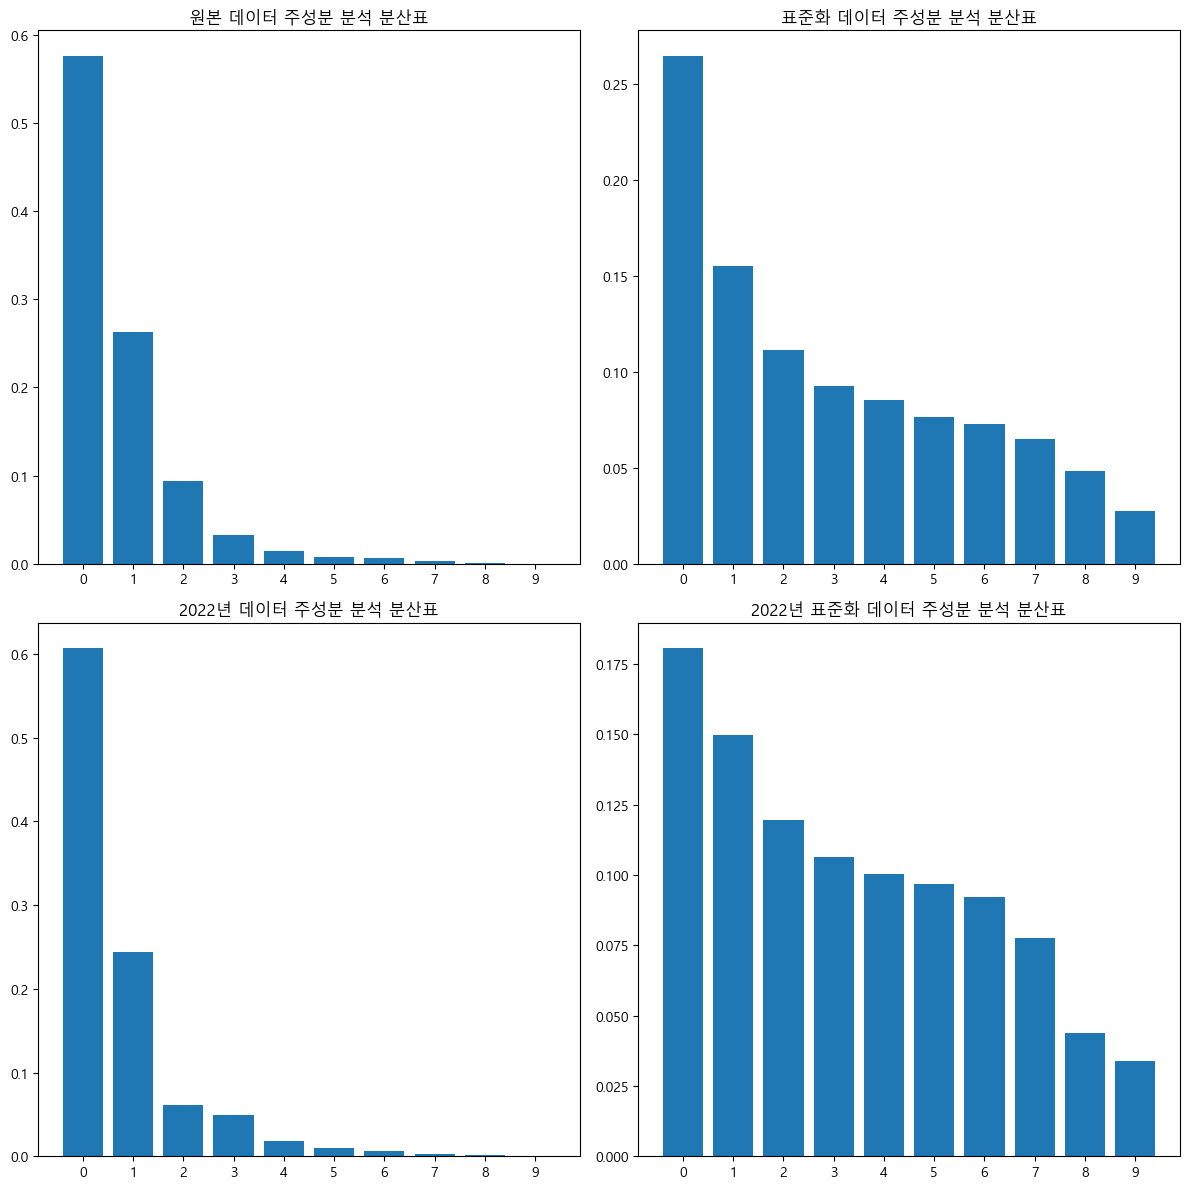

In [9]:
# 60년 데이터 주요 성분 분산 비교표
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

# 데이터 표준화
std = StandardScaler()
data_std = std.fit_transform(data)
data2022_std = std.fit_transform(data2022)

# PCA 적용
pca = PCA()

datasets = {
    '원본 데이터 주성분 분석 분산표': data,
    '표준화 데이터 주성분 분석 분산표': data_std,
    '2022년 데이터 주성분 분석 분산표': data2022,
    '2022년 표준화 데이터 주성분 분석 분산표': data2022_std
}

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (title, dataset) in zip(axes.flatten(), datasets.items()):
    pca.fit(dataset)
    explained_variance_ratio = pca.explained_variance_ratio_
    x = np.arange(len(explained_variance_ratio))
    ax.bar(x, explained_variance_ratio)
    ax.set_xticks(x)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [10]:
data2023 = pd.read_csv('data/dataframes/dataframe_2023to2023.csv', index_col=0)
data2023 = data2023.drop('date', axis=1)
label2023 = pd.read_csv('data/dataframes/label_2023to2023.csv', index_col=0)

In [11]:

X_train = data2022
X_test = data2023
y_train = label2022
y_test = label2023

# 복원추출 함수
def bootstrap_sampling(dataframe, label, n_samples):
    X_resampled = []
    y_resampled = []
    for _ in range(n_samples):
        idx = np.random.choice(dataframe.index, size=len(dataframe), replace=True)
        X_resampled.append(dataframe.loc[idx].values)
        y_resampled.append(label.loc[idx].values)
    return np.array(X_resampled), np.array(y_resampled)

# 복원추출 수행
X_resampled, y_resampled = bootstrap_sampling(data2022, label2022, 1)

# 기존 데이터프레임과 동일한 shape으로 변환
X_train = X_resampled.reshape(-1, data2022.shape[1])
y_train = y_resampled.reshape(-1, 1)

print(X_train.shape)
print(y_train.shape)

(520000, 10)
(520000, 1)


In [12]:
# 원본데이터
from sklearn.neighbors import KNeighborsRegressor

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train_pca, y_train)

y_predicted = model.predict(X_test_pca)

train_score = model.score(X_train_pca, y_train)
test_score = model.score(X_test_pca, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

c:\Users\tlsek\OneDrive\바탕 화면\BillboardAnalitics\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


학습 세트 정확도 :  0.692
검증 세트 정확도 :  -0.502


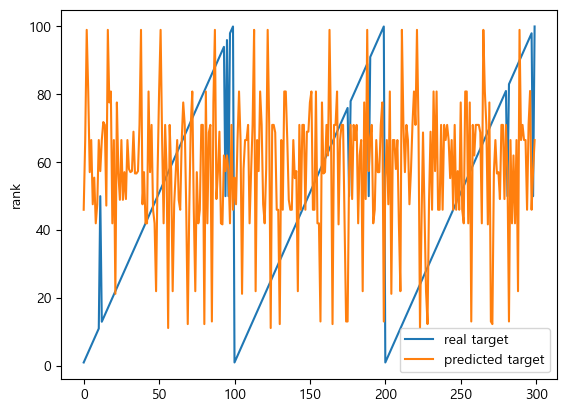

In [14]:
number_of_sample = 300

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

학습 세트 정확도 :  0.69
검증 세트 정확도 :  -0.594


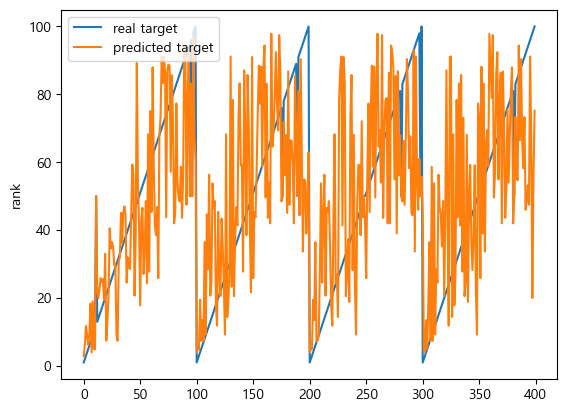

In [21]:
# 표준화 데이터
from sklearn.neighbors import KNeighborsRegressor

pca = PCA(n_components=7)
std= StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train_pca, y_train)

y_predicted = model.predict(X_test_pca)

train_score = model.score(X_train_pca, y_train)
test_score = model.score(X_test_pca, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

number_of_sample = 400

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

In [31]:
# 표준화 pca 하이퍼파라미터 그리드 설정

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [5, 10, 15, 20],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_pca, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", grid_search.best_params_)
print("최적의 검증 점수: ", grid_search.best_score_)

최적의 하이퍼파라미터:  {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
최적의 검증 점수:  0.6983330206934315


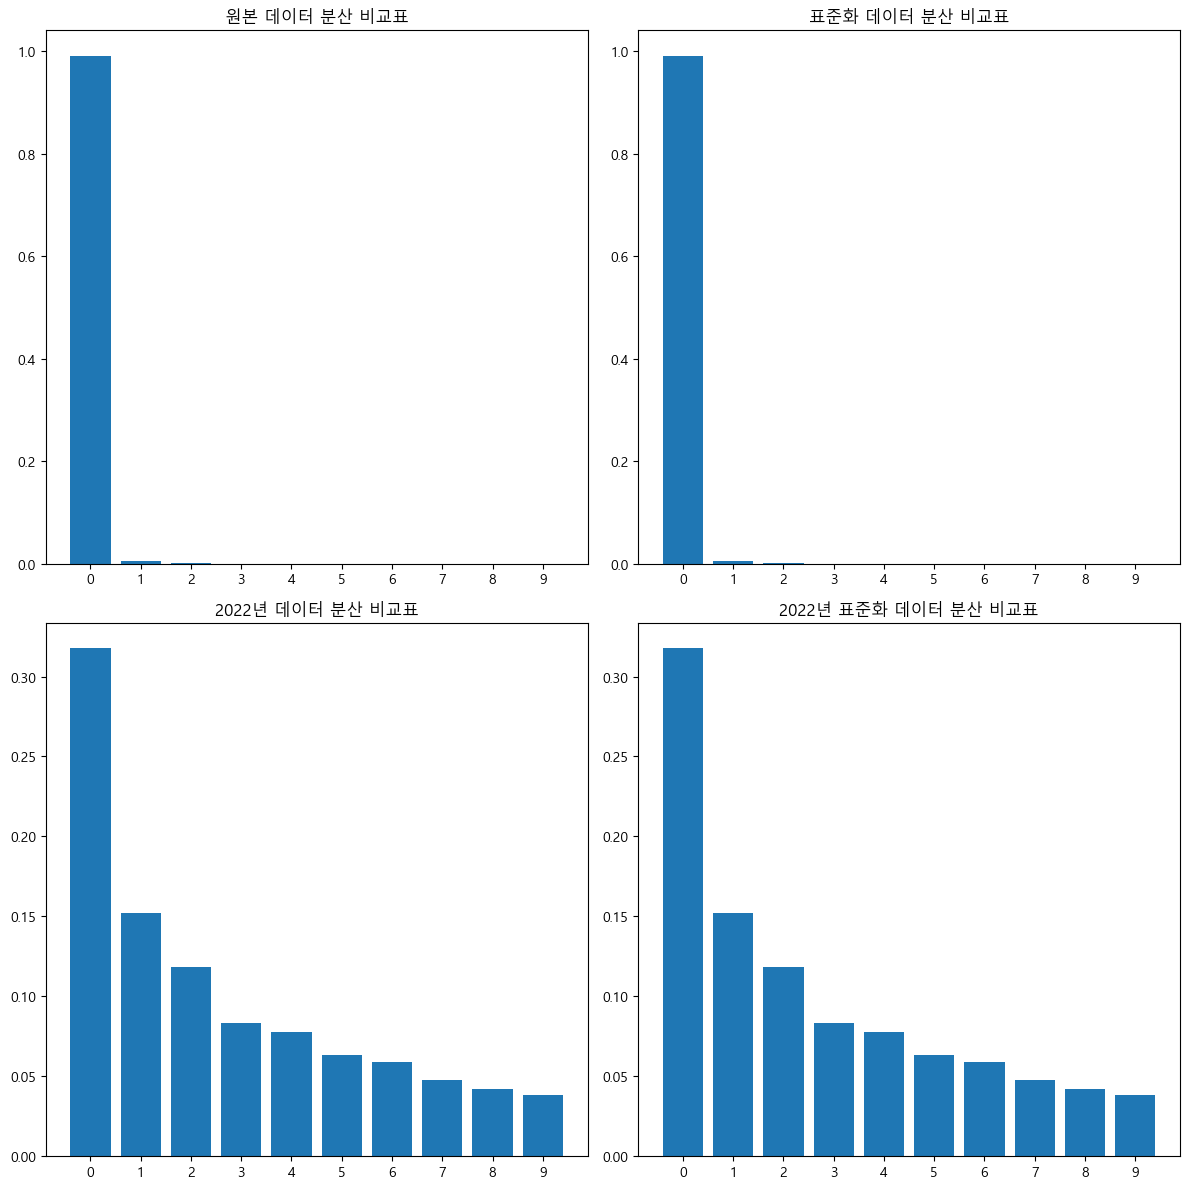

In [16]:
# lda 주요 성분 분산표
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 데이터 표준화
std = StandardScaler()
data_std = std.fit_transform(data)
data2022_std = std.fit_transform(data2022)

# LDA 적용
lda = LinearDiscriminantAnalysis()

datasets = {
    '원본 데이터 분산 비교표': (data, label),
    '표준화 데이터 분산 비교표': (data_std, label),
    '2022년 데이터 분산 비교표': (data2022, label2022),
    '2022년 표준화 데이터 분산 비교표': (data2022_std, label2022)
}

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (title, (dataset, labels)) in zip(axes.flatten(), datasets.items()):
    lda.fit(dataset, labels.values.reshape(-1))  # labels를 numpy 배열로 변환 후 reshape
    explained_variance_ratio = lda.explained_variance_ratio_
    x = np.arange(len(explained_variance_ratio))
    ax.bar(x, explained_variance_ratio)
    ax.set_xticks(x)
    ax.set_title(title)

plt.tight_layout()
plt.show()


In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# LDA 적용
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# KNN 모델 적용
model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train_lda, y_train)

y_predicted = model.predict(X_test_lda)

train_score = model.score(X_train_lda, y_train)
test_score = model.score(X_test_lda, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))


c:\Users\tlsek\OneDrive\바탕 화면\BillboardAnalitics\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tlsek\OneDrive\바탕 화면\BillboardAnalitics\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


학습 세트 정확도 :  0.691
검증 세트 정확도 :  -0.194


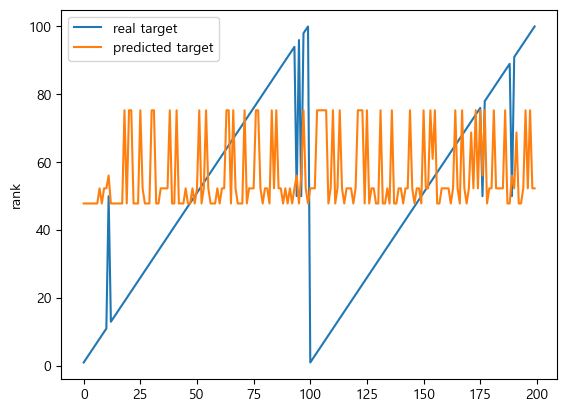

In [18]:
number_of_sample = 200

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

In [22]:
# 표준화 LDA 적용
lda = LDA(n_components=6)

std= StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

# KNN 모델 적용
model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train_lda, y_train)

y_predicted = model.predict(X_test_lda)

train_score = model.score(X_train_lda, y_train)
test_score = model.score(X_test_lda, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

c:\Users\tlsek\OneDrive\바탕 화면\BillboardAnalitics\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 세트 정확도 :  0.692
검증 세트 정확도 :  -0.44


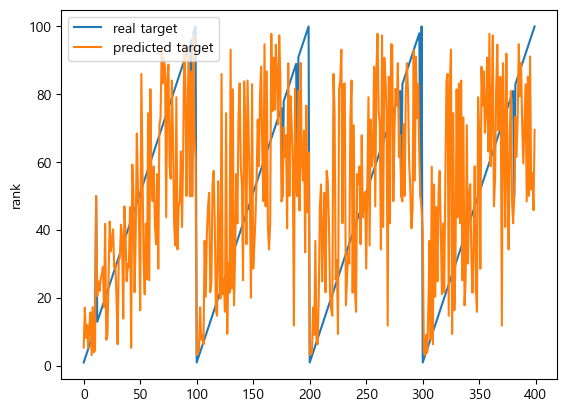

In [23]:
number_of_sample = 400

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [5, 10, 15, 20],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

model = KNeighborsRegressor()
# GridSearchCV 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, scoring='r2')
grid_search.fit(X_train_lda, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터: ", grid_search.best_params_)
print("최적의 검증 점수: ", grid_search.best_score_)

최적의 하이퍼파라미터:  {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
최적의 검증 점수:  0.6983024145599475


In [26]:
def getBestKNN(X_train, X_test):
    knn = KNeighborsRegressor()
    param_grid = {
        'n_neighbors': [16,18,20,22,24],
        'weights': ['uniform'],
        'metric': ['minkowski','euclidean','manhattan'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [10,20,30],
        'p': [1]
    }

    grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    print('Best parameters : ', grid_search.best_params_)
    print('Best score : ', grid_search.best_score_)
    print('Best estimator test score : ', grid_search.best_estimator_.score(X_test, y_test))

    return grid_search.best_estimator_

In [ ]:
getBestKNN(X_train_lda, X_test_lda)

c:\Users\tlsek\OneDrive\바탕 화면\BillboardAnalitics\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


학습 세트 정확도 :  0.028
검증 세트 정확도 :  -0.102


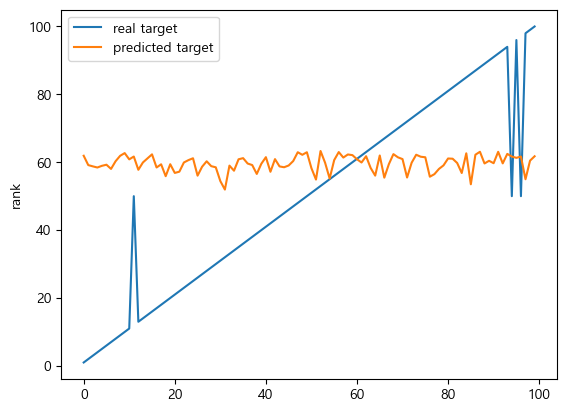

In [23]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso 회귀 모델 적용
model = Lasso(alpha=0.1)  # alpha 값은 필요에 따라 조정할 수 있습니다
model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()

학습 세트 정확도 :  0.028
검증 세트 정확도 :  -0.116


c:\Users\tlsek\OneDrive\바탕 화면\BillboardAnalitics\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


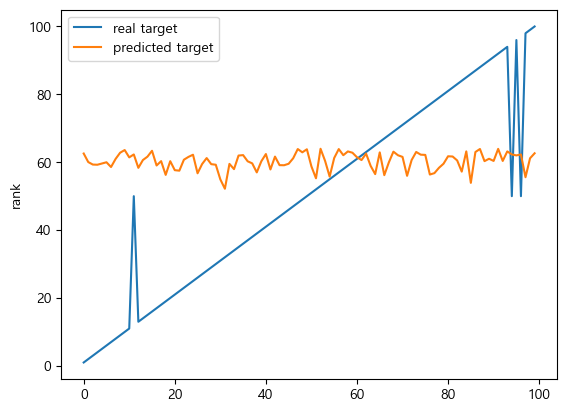

In [24]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge 회귀 모델 적용
model = Ridge(alpha=0.1)  # alpha 값은 필요에 따라 조정할 수 있습니다
model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print('학습 세트 정확도 : ', round(train_score, 3))
print('검증 세트 정확도 : ', round(test_score, 3))

number_of_sample = 100

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label='predicted target')
plt.ylabel('rank')
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 리스트
models = {
    'Ridge': Ridge(alpha=0.1),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio는 L1과 L2 비율을 조정합니다
}

# 결과 저장용 딕셔너리
results = {}

# 모델 학습 및 예측
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_predicted = model.predict(X_test_scaled)
    
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    
    results[name] = {
        'train_score': train_score,
        'test_score': test_score,
        'y_predicted': y_predicted
    }
    
    print(f'{name} 모델 학습 세트 정확도: {round(train_score, 3)}')
    print(f'{name} 모델 검증 세트 정확도: {round(test_score, 3)}')

# 예측 결과 시각화
number_of_sample = 100
plt.figure(figsize=(14, 7))

for name, result in results.items():
    plt.plot(range(number_of_sample), result['y_predicted'][:number_of_sample], label=f'{name} predicted')

plt.plot(range(number_of_sample), y_test[:number_of_sample], label='real target', linestyle='--')
plt.ylabel('rank')
plt.legend()
plt.show()


In [ ]:
#이이이이잉

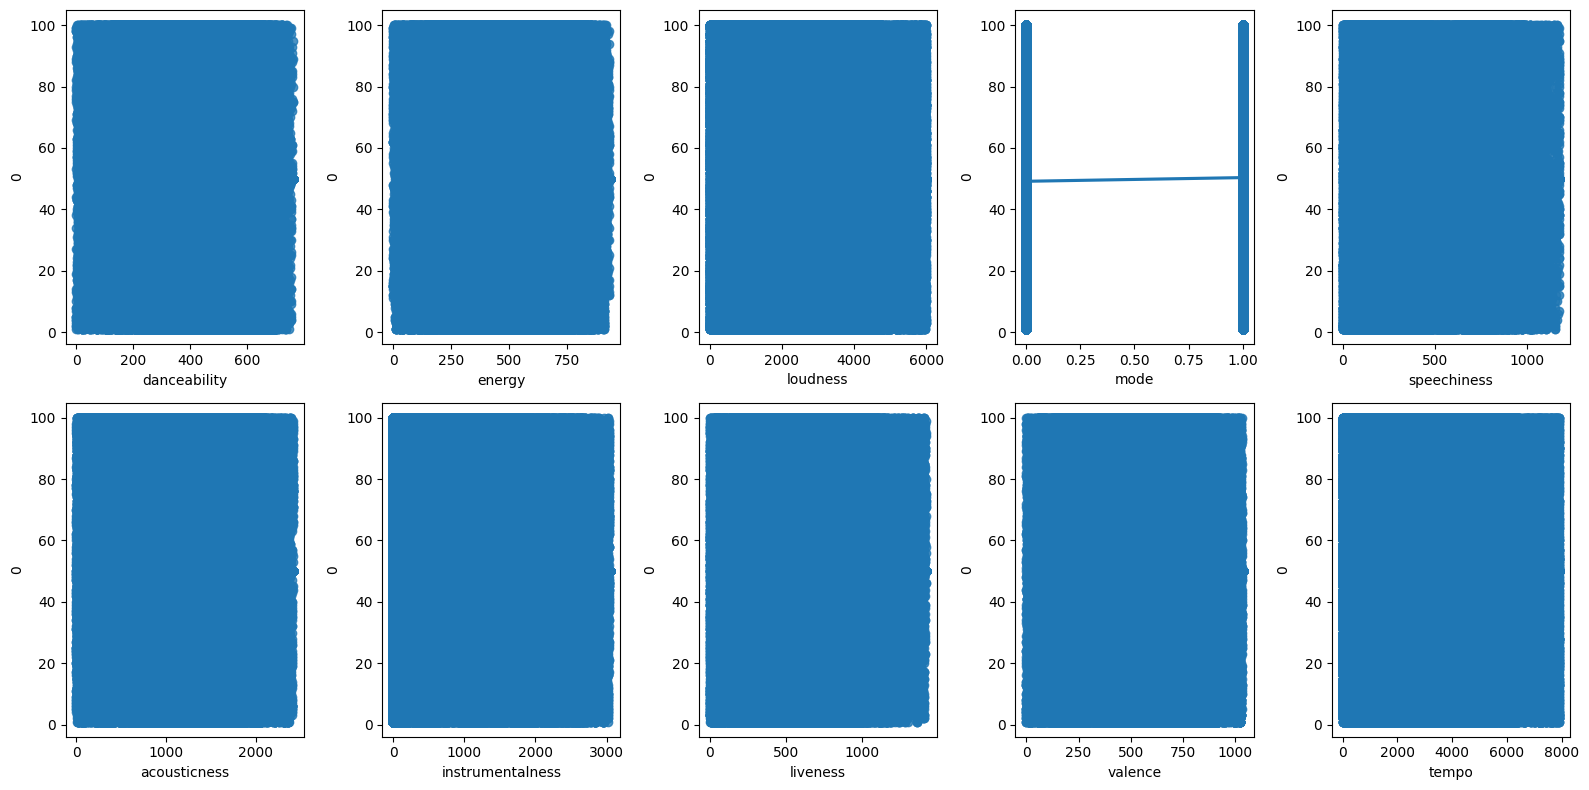

In [53]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # 데이터 병합
# df = pd.concat([data, label], axis=1)

# # 서브플롯 생성
# fig, axs = plt.subplots(figsize=(16, 8), ncols=5, nrows=2)
# features = data.columns

# # 각 feature에 대해 회귀선 그리기
# for i, feature in enumerate(features):
#     row = i // 5
#     col = i % 5
#     sns.regplot(x=feature, y=label.columns[0], data=df, ax=axs[row][col])

# plt.tight_layout()
# plt.show()
# # 각 feature과 label간의 상관관계가 없음.